In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import square as sq
from time import time as t
import square_gap as gap
from matplotlib.colors import Normalize as norm
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import conductivity as cnd
from IPython.display import clear_output
import matplotlib.cm as cm
import collectiveModes as col
def getmodes(λ,modes,index,tol,rounding=10):
    eigvals = abs(λ[index])
    nc = len(eigvals)//2
    mincond = eigvals<tol
    for i,val in enumerate(eigvals):
        if mincond[i]:
            print(f"Eigenvalue is {val:.2g}, at ω= {ωarray[index]:.5f} Mode is: ")
            print(np.round(modes[index,:nc,i]+1j*modes[index,nc:,i],rounding))
ηs00=0.059755463276354844

In [2]:
##Quick Gapfinder: Assumes a solution of form ηs+iη_d φ_d#
Vs = 1
Vd = 1
ηs0=   1
ηd0 =  1
N=600
q=0.000
μ=0
T=0.0
ωc=10
ηs,ηd = gap.findGapVeryFast(Vs,Vd,ηs0,ηd0,N=N,tol=1e-10,maxiter=1000,ωc=ωc,T=T,qx=q,μ=μ,quiet=False,use="square")
print("η_s = ",ηs)
print("η_d = ",ηd)
Varr = np.array([0,Vd,0,0,Vs])
#fE1 = gap.free_energy((np.array([0,ηd,0,0,ηs]),))
print()
#ηalt = gap.findGapFast(V=Varr,η_in=η0arr,N=N,tol=1e-10,qx=q,ωc=ωc,T=T,μ=μ)
#ηalt2 = gap.findGap(V=Varr,η_in=η0arr,N=N,tol=1e-10,ωc=ωc,T=T,μ=μ,quiet=False,maxiter=1000)
#print("η_s quick : ",ηalt[-1])
#print("η_d quick : ",ηalt[1])
#print("η_s full: ",ηalt2[-1])
#print("η_s very quick: ",ηs)

Maximal difference is 1.118433300954151e-10
Maximal difference is 1.0831957351929087e-10
Maximal difference is 1.0490684204872579e-10
Maximal difference is 1.0160157402416242e-10
Maximal difference is 9.840049123950581e-11
Converged after 515 iterations
η_s =  0.04283130979776825
η_d =  0.037176842641138776



In [3]:
η0arr = np.array([0,1j,0,0,1])
Varr = np.array([0,0.7,0,0,1])
ηdalt,ηsalt = gap.findGapFast(V=Varr,η_in=η0arr,N=N,tol=1e-10,ωc=ωc,T=T,μ=μ,maxiter=10)[[1,-1]]
print(ηsalt)
print(ηdalt)

[0.+1.j 1.+0.j]
Maximal difference is 1.4708801710904522
0.31745690111140173
[2.21057740e-18+1.02163424e-01j 2.57526134e-01+3.15796771e-18j]
Maximal difference is 0.15718606830995754
0.14653470859388731
[3.24954878e-17+2.95314581e-02j 1.38544390e-01-6.15803704e-18j]
Maximal difference is 0.05308123250807733
0.09395401250534942
[-2.58637556e-17+1.11246624e-02j  9.22842890e-02-5.84224027e-18j]
Maximal difference is 0.025096212025300182
0.06925561709215439
[-3.61429405e-17+4.78213150e-03j  6.88457638e-02-4.59879048e-18j]
Maximal difference is 0.014083715143661453
0.05534219397872804
[-5.52644350e-20+2.23201065e-03j  5.52316241e-02-2.73855013e-18j]
Maximal difference is 0.008759991748931785
0.04665030477753915
[2.87375062e-18+1.10252184e-03j 4.66184966e-02-1.94659104e-18j]
Maximal difference is 0.005827906428937062
0.04084950309723879
[-1.60266862e-18+5.67485685e-04j  4.08399184e-02-1.46919514e-18j]
Maximal difference is 0.004062679318972386
0.03679771390303105
[-5.91329455e-18+3.01246663e

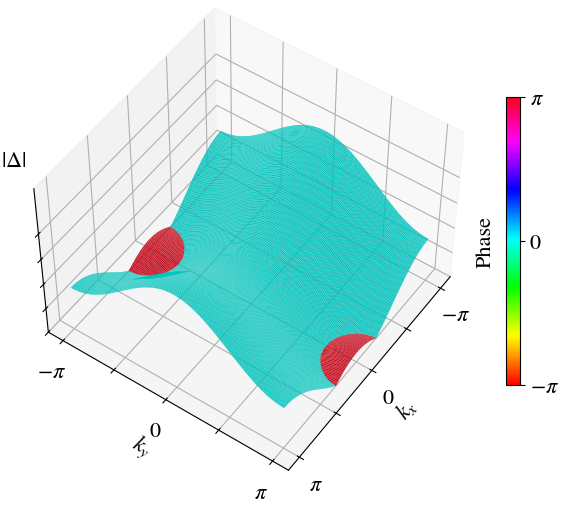

In [19]:
normalize_phase = norm(vmin=-np.pi,vmax=np.pi)
k = np.linspace(-np.pi,np.pi,400)
kx,ky = np.meshgrid(k,k)
φd = sq.φvector(kx,ky)[...,1]
Δ=ηs+1*ηd*φd
m = np.angle(Δ)
#m[abs(Δ)<1e-5]=10
my_cmap = plt.get_cmap("hsv")
my_cmap.set_over(alpha=0)
phase = my_cmap(normalize_phase(m))
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(121, projection='3d')
plt.tight_layout()
ax.plot_surface(kx,ky,abs(Δ),facecolors=phase,vmin=0.001,linewidth=0,axlim_clip=True)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel("$|\\Delta|$ \n",rotation=0,labelpad=-10,linespacing=14)
#ax.zaxis._axinfo['label']['space_factor'] = 3
ax.set_zlim((1e-5,1.5*np.max(abs(Δ))))
ax.view_init(elev=50,azim=35)
proxy = cm.ScalarMappable(cmap=my_cmap,norm=normalize_phase)
proxy.set_array(m)
cbar = plt.colorbar(proxy,ax=ax,shrink=0.25,ticks=[-np.pi,0,np.pi],label="Phase",location="right")
cbar.set_ticklabels(["$-\\pi$","0","$\\pi$"])
cbar.set_label("Phase",labelpad=-60)
plt.tight_layout()
#plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],["$-\\pi$","","$0$","","$\\pi$"])
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],["$-\\pi$","","0","","$\\pi$"])
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],["$-\\pi$","","0","","$\\pi$"])
plt.gca().set_zticks([0,0.025,0.05,0.075,0.1],[])
plt.xlabel("$k_x$")
plt.ylabel("$k_y$")
#fig.savefig("./Plots/GapShape_s+d.pdf",bbox_inches='tight')

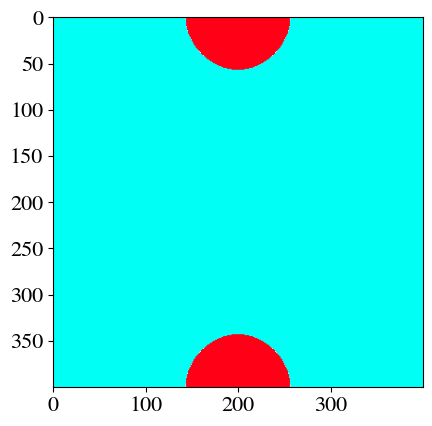

In [53]:
plt.imshow(m,cmap=my_cmap,vmin=-np.pi,vmax=np.pi)

In [21]:
ωmax = 3*np.max(abs(Δ))
N=1200
cutoff = 1e-5
Nω=300
ωarray = np.linspace(cutoff,ωmax,Nω)
s=t()
σ_QP,σ_coll,Uinv,Q,Qm = cnd.σ_simplified(Vs,Vd,ηs,ηd,ωarray,N=N,ωc=ωc,T=T,reg=5e-4j,qx=q,μ=μ)
e=t()
print(f"Took {e-s:.2f} seconds")
print(np.round(np.mean(abs(Uinv),axis=0),10))

Momentum interval 1 of 8
Momentum interval 2 of 8
Momentum interval 3 of 8
Momentum interval 4 of 8
Momentum interval 5 of 8
Momentum interval 6 of 8
Momentum interval 7 of 8
Momentum interval 8 of 8
[2.49243035e+02 2.09714336e+02 2.63279517e+02 2.10571549e-04
 3.02237582e-01 4.61590530e-01 8.69232758e-03 1.13824889e-02]
5.722673483282703e-07
[[4.18378099e-02 0.00000000e+00]
 [1.75901912e-04 0.00000000e+00]
 [9.24365902e-05 0.00000000e+00]
 [4.98078919e-02 0.00000000e+00]
 [6.52784638e-04 0.00000000e+00]
 [2.96580860e-01 0.00000000e+00]]
Took 35.04 seconds
[[2.00468146e-01 1.66482000e-05 2.23919248e-02 1.31955484e-01]
 [1.66482000e-05 2.12086099e-01 1.31955484e-01 1.53624073e-02]
 [2.23953597e-02 1.31954177e-01 1.89430365e-01 1.58546000e-05]
 [1.31954177e-01 1.53656460e-02 1.58546000e-05 2.27405721e-01]]


0.09138280447856652


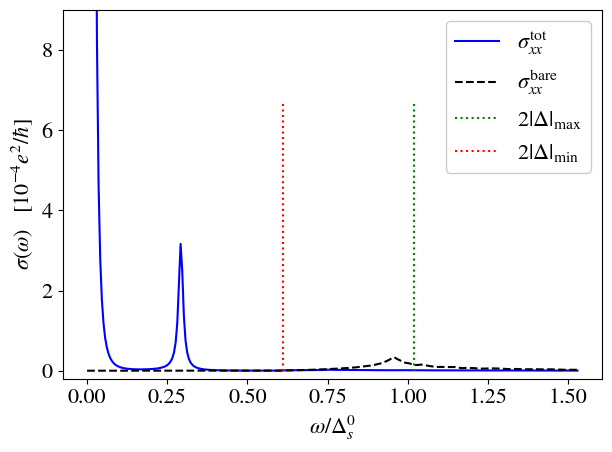

In [25]:
bare = σ_QP[:,0,0]
Δmin= ηs
Δmax = np.max(abs(Δ))
print(ωmax)
coll = σ_coll[:,0,0]
#dat = np.array([ωarray,bare,coll,Δmin*np.ones_like(coll)])
#np.savetxt(f"./conductivityData/vd={Vd},vs={Vs},N={N}(d-phase).txt",dat)
#ωarray,bare,coll = np.loadtxt("./conductivityData/vd=1e-10,vs=1,N=1200.txt")
plt.plot(ωarray/ηs00,(bare+coll)*1e4,label="$\\sigma_{xx}^{\\text{tot}}$",c="blue")
plt.plot(ωarray/ηs00,(bare)*1e4,label="$\\sigma_{xx}^{\\text{bare}}$",linestyle="dashed",c="black")
plt.plot([2*Δmax/ηs00,2*Δmax/ηs00],[0,np.max(bare)*2e5],label="$2\\left|\\Delta\\right|_\\text{max}$",linestyle="dotted",c="green")
plt.plot([2*Δmin/ηs00,2*Δmin/ηs00],[0,np.max(bare)*2e5],label="$2\\left|\\Delta\\right|_\\text{min}$",linestyle="dotted",c="red")

#plt.plot(ωarray,corr,label="$\\sigma_{xx}^{\\text{bare}}$")
plt.ylim((-0.2,9))
plt.ylabel("$\\sigma(\\omega)\\quad[10^{-4}e^2/\\hbar]$")
plt.xlabel("$\\omega/\\Delta_s^0$")
plt.legend(framealpha=1,loc ="upper right")
plt.tight_layout()
#plt.savefig(f"./Plots/conductivityVd={Vd},Q={q}.pdf",bbox_inches="tight")

In [10]:
Q_copy = np.copy(Q)
Qm_copy = np.copy(Qm)
supp = (2) #Choosing which components to suppress: 0: real d, 1: real s, 2: imag d, 3: imag s
for comp in supp:
    Q_copy[:,:,comp]*=0
    Qm_copy[:,:,comp]*=0
σ_suppressed1 = cnd.collective_σ(Uinv,Q_copy,Qm_copy,ωarray)[:,0,0]
plt.ylim((-0.01,8))
plt.plot(ωarray/ηs00,(bare+σ_suppressed1)*1e4)

TypeError: 'int' object is not iterable

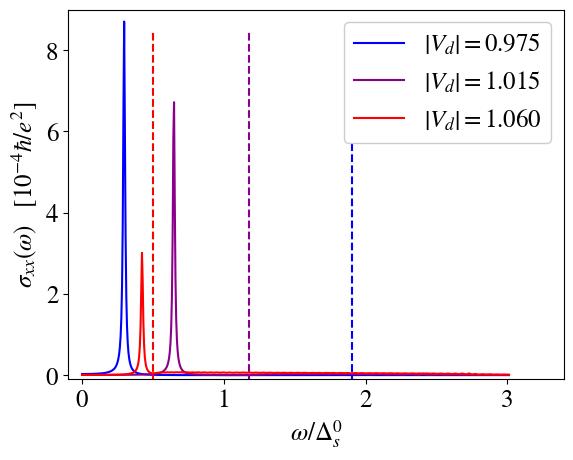

In [24]:
#Plotting conductivities in the s+id-wave phase
vd = [0.975,1.015,1.06]
colors=["blue","darkmagenta","red"]
for j,v in enumerate(vd):
    if j==2: nn=8000
    elif j==1: nn=3200
    else: nn=1200
    ω,bare,coll,Δmin = np.loadtxt(f"./conductivityData/vd={v},vs=1,N={nn}(s+id-phase).txt")
    plt.plot(ω/ηs00,(bare+coll)*1e4,label=f"$\\left|V_d\\right|={v:.3f}$",c=colors[j])
    plt.plot(2*Δmin[0:2]/ηs00,[-1,8.5],c=colors[j],linestyle="dashed")
leg = plt.legend(framealpha=1,loc="upper right")
plt.ylabel("$\\sigma_{xx}(\\omega)\\quad[10^{-4}\\hbar/e^2]$")
plt.xlabel("$\\omega/\\Delta_s^0$")
plt.ylim((-0.1,9))
plt.xlim((-0.1,3.4))
#plt.savefig("./Plots/conductivities_s+id-phase.pdf",bbox_inches='tight')

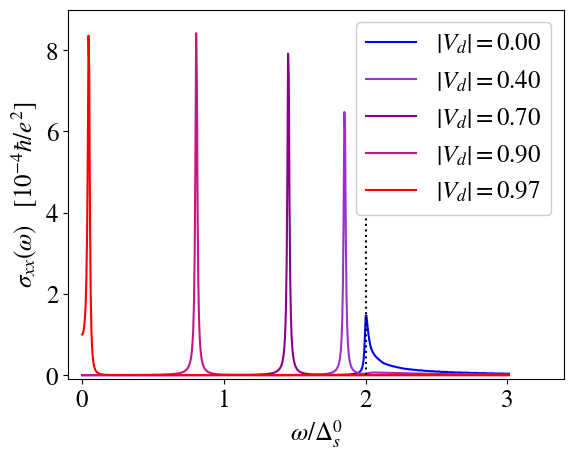

In [21]:
#Plotting conductivities in the s-wave phase
vd = [0,0.4,0.7,0.9,0.97]
colors=["blue","darkorchid","darkmagenta","mediumvioletred","red"]
for j,v in enumerate(vd):
    nn=1200
    ω,bare,coll = np.loadtxt(f"./conductivityData/vd={v},vs=1,N={nn}.txt")
    plt.plot(ω/ηs00,(bare+coll)*1e4,label=f"$\\left|V_d\\right|={v:.2f}$",c=colors[j])
plt.plot([2]*2,[0,6],linestyle="dotted",c="black")#,label="$2\\left|\\Delta\\right|$")
plt.ylabel("$\\sigma_{xx}(\\omega)\\quad[10^{-4}\\hbar/e^2]$")
plt.xlabel("$\\omega/\\Delta_s^0$")
leg = plt.legend(framealpha=1,loc="upper right")
plt.ylim((-0.1,9))
plt.xlim((-0.1,3.4))
#plt.savefig("./Plots/conductivities_swave.pdf",bbox_inches='tight')

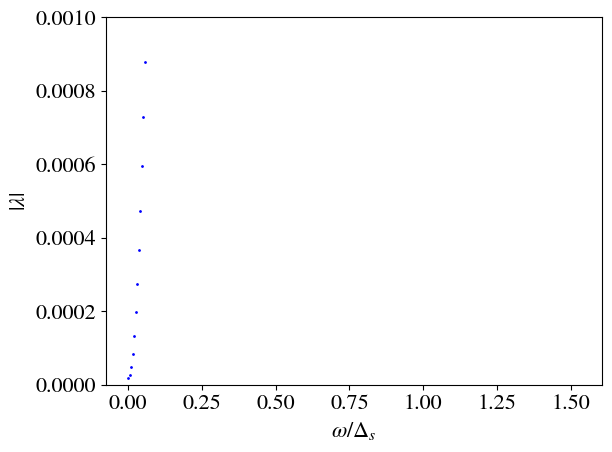

In [23]:
λ,modes = np.linalg.eig(Uinv)
plt.plot(ωarray/ηs00,np.abs(λ),linestyle="none",marker=".",markersize=2,color="b")
plt.ylim((0,0.001))
#ps = [232,380]
#for i,peak in enumerate(ps):
#    plt.plot([ωarray[peak],ωarray[peak]],[1,np.min(abs(λ[peak]))],label="$\\omega_{"+str(i+1)+"}$"+f"= {ωarray[peak]:.3f}")
plt.ylabel("$|\\lambda|$")
plt.xlabel("$\\omega/\\Delta_s$")
#plt.title(f"$|V_d|={Vd}$")
plt.tight_layout()
#plt.legend(loc="center left")
#plt.savefig("./Plots/modes_Vd=0,7.pdf",bbox_inches='tight')

In [62]:
i=61
getmodes(λ,modes,i,.1,rounding=4)
print(np.round(Uinv[i],4))
print(col.mixedwave_factor(ωarray[i],ηs,ηd,N=N,qx=0))
print(col.mixedwave_factor(0,ηs,ηd,N=N,qx=0))
print(col.findMode_mixedwave(2*ηs,ηs,ηd,N=600,qx=q))
print(col.findMode_mixedwave(2*ηs_ar[127],ηs_ar[127],ηd_ar[127],N=600,qx=0))

Eigenvalue is 0.035, at ω= 0.03673 Mode is: 
[0.6594+0.j     0.    +0.7518j]
Eigenvalue is 0.00019, at ω= 0.03673 Mode is: 
[-1.000e-04+0.6458j  7.635e-01-0.j    ]
[[-0.1659+0.0001j  0.    +0.j      0.    +0.j      0.1765+0.0001j]
 [ 0.    +0.j     -0.1492+0.0001j  0.1765+0.0001j  0.    +0.j    ]
 [ 0.    +0.j      0.1765+0.0001j -0.2086+0.0001j  0.    +0.j    ]
 [ 0.1765+0.0001j  0.    +0.j      0.    +0.j     -0.1196+0.0001j]]
(-1.392843118566342e-05-6.591575404713256e-05j)
(0.011594417402414195-0j)
 message: Solution found.
 success: True
  status: 0
     fun: 6.587080204394298e-05
       x: 0.03670906302575917
     nit: 14
    nfev: 14
 message: Solution found.
 success: True
  status: 0
     fun: 6.595657466689953e-05
       x: 0.036756670356292126
     nit: 13
    nfev: 13


## Testing how fluctuations are responsible for the optical conductivity

## Phase diagram of the model

In [15]:
N=600
q=0.00
μ=0
T=0.
ωc=20
Vs = 1
ηres = []
num=120
i=1
dwave_pairing = np.concatenate((np.linspace(0.01,0.95,95),np.linspace(0.96,1.0,80),np.linspace(1.01,1.25,50)))
print(dwave_pairing[1])
for vd in dwave_pairing:
    print(i, " out of ", 225)
    ηs,ηd = gap.findGapVeryFast(Vs,vd,tol=1e-8,N=N,maxiter=1000,ωc=ωc,T=T,qx=q,μ=μ,quiet=True)
    ηres.append([ηs,ηd])
    #η0 = η+np.array([0,0.2j,0,0,0.2])
    clear_output(wait=True)
    i+=1

225  out of  225
Converged after 160 iterations


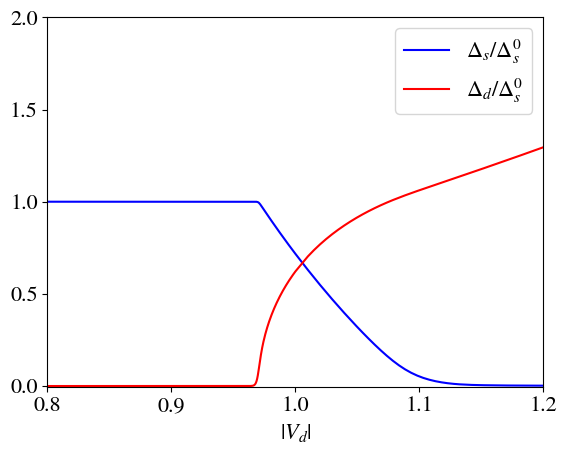

In [10]:
dat = np.loadtxt("gapvalues.txt").transpose()
#dat_free = np.loadtxt("freeGapValues.txt").transpose()
dwave_pairing,ηs_dat,ηd_dat = dat
#dwave_free,ηs_f,ηd_f = dat_free
plt.plot(dwave_pairing,ηs_dat/abs(ηs_dat[0]),label="$\\Delta_s/\\Delta_s^0$",c="blue")
plt.plot(dwave_pairing,ηd_dat/abs(ηs_dat[0]),label="$\\Delta_d/\\Delta_s^0$",c="red")
#plt.plot(dwave_free*2,ηs_f/abs(ηs_f[0]),linestyle="dashed",c="blue")
#plt.plot(dwave_free*2,ηd_f/abs(ηs_f[0]),linestyle="dashed",c="red#")
plt.legend()
plt.xlim((.8,1.2))
plt.ylim((-0.005,2))
plt.xlabel("$|V_d|$")
#plt.title(f"$V_s=-{Vs},q={q}$")
#plt.grid(True,which="both")
#plt.yscale("log")
plt.savefig("./Plots/sd-transition.pdf",bbox_inches='tight')

In [18]:
#phase_diagram = np.concatenate((dwave_pairing[:,None],ηres),axis=1)
#np.savetxt("gapvalues.txt",phase_diagram)
print(phase_diagram[113])

[0.96911392 0.05968927 0.00239817]


# Finding the BS-mode spectrum

In [3]:
pd = np.loadtxt("gapvalues.txt").transpose()
dwave_int,ηs_ar,ηd_ar = pd

In [12]:
Vs=1
N=800
q=0.00
μ=0
T=0.
spectrum = []
swave=True
for j,vd in enumerate(dwave_int):
    sol=col.findMode(ηs_ar[j],ηd_ar[j],vd,swave=swave,qx=q,N=N)
    print(sol)
    print(f"{j} out of {len(dwave_int)}, vd = {vd}")
    clear_output(wait=True)
    spectrum.append(sol.x)
    if sol.x<1e-4:
        swave=False

 message: Solution found.
 success: True
  status: 0
     fun: 0.015699277933993845
       x: 0.0001404817057750532
     nit: 7
    nfev: 7
224 out of 225, vd = 1.25


0.647477664374946
1.0148979591836735


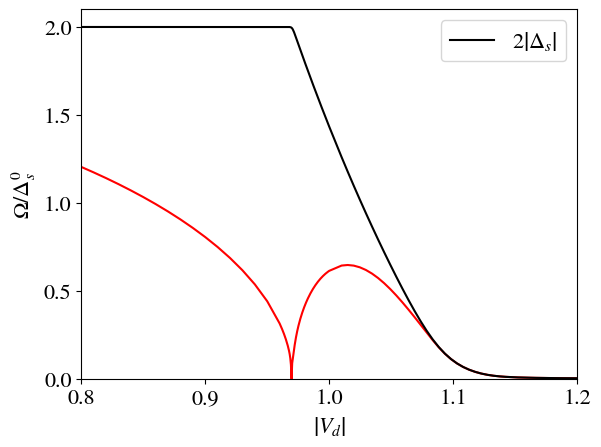

In [9]:
dwave_int, spectrum = np.loadtxt("BS_Spectrum.txt")
η0=ηs00
data = np.array([dwave_int,spectrum])
#np.savetxt("BS_Spectrum.txt",data)
plt.plot(dwave_int,spectrum/η0,c="r")#,label="Collective Modes")
plt.plot(dwave_int,2*ηs_ar/η0,linestyle="solid",c="black",label="$2\\left|\\Delta_s\\right|$")
plt.xlabel("$\\left|V_d\\right|$")
plt.ylabel("$\\Omega/\\Delta_s^0$")
plt.xlim((.8,1.2))
plt.ylim((0,2.1))
plt.legend()
#plt.savefig("./Plots/BS_Spectrum.pdf",bbox_inches="tight")
print(spectrum[176]/η0)
print(dwave_int[176])

In [7]:
Vs = 0.5
Vd = 0.2
V=np.array([0,Vd,0,0,Vs])
η0=np.array([0,1j,0,0,1])
#η0 = np.array([0,1.28188943e-17+3.19627718e-03j,0,0,2.36077848e-03-9.88988983e-18j])#Vd=0.41
#η0 = np.array([0,1.20541204e-17+3.91469034e-03j,0,0,1.13649652e-03-3.04118228e-18j])#Vd=0.42

N=600
q=0.001
μ=0
T=0.
ωc=20
Δ,η = gap.findGapFast(N=N,V=V,η_in=η0,tol=1e-12,maxiter=2000,ωc=ωc,T=T,qx=q,μ=μ,quiet=False)
for i in range(5):
    print(f"{i+1}th component is {η[i]:.4g}")
F_E = gap.free_energy(η,V,T+.01,N=N)
print(f"Free Energy is {F_E}")
-1.621177364546701

Maximal difference is 1.916578701299798e-11
Maximal difference is 1.3792655385869157e-11
Maximal difference is 9.925892573148243e-12
Maximal difference is 7.143168001544353e-12
Maximal difference is 5.1405815368332775e-12
Maximal difference is 3.6994175084403835e-12
Maximal difference is 2.6622965984546276e-12
Maximal difference is 1.9159188124895365e-12
Maximal difference is 1.3787955152610998e-12
Maximal difference is 9.92242746300498e-13
Converged after 70 iterations
1th component is 0-0j
2th component is 4.105e-19+2.708e-25j
3th component is -0+0j
4th component is 0-0j
5th component is 0.004901+1.942e-20j
Free Energy is -1.6212612095343695


-1.621177364546701

In [8]:
ωmax = 0.014#3*np.max(abs(Δ))
cutoff = 1e-5
Nω=300
ωarray = np.linspace(cutoff,ωmax,Nω)
s=t()
σ_QP2,σ_coll2,Uinv2,Q2,Qm2 = cnd.calculate_σ(V,η,ωarray,N=N,ωc=ωc,T=T,reg=1e-4j,qx=q,μ=μ)
e=t()
print(f"Took {e-s:.2f} seconds")
print(np.round(np.mean(abs(Uinv),axis=0),4))
print()
print(np.round(np.mean(abs(Uinv2),axis=0),4))

Momentum interval 1 of 4
Momentum interval 2 of 4
Momentum interval 3 of 4
Momentum interval 4 of 4
Took 18.79 seconds
[[3.1506e+00 0.0000e+00 0.0000e+00 6.0000e-04]
 [0.0000e+00 4.8880e-01 6.0000e-04 0.0000e+00]
 [0.0000e+00 6.0000e-04 3.1102e+00 0.0000e+00]
 [6.0000e-04 0.0000e+00 0.0000e+00 1.2620e+00]]

[[3.1506e+00 0.0000e+00 0.0000e+00 6.0000e-04]
 [0.0000e+00 4.8880e-01 6.0000e-04 0.0000e+00]
 [0.0000e+00 6.0000e-04 3.1102e+00 0.0000e+00]
 [6.0000e-04 0.0000e+00 0.0000e+00 1.2620e+00]]


(-9.0, 9.0)

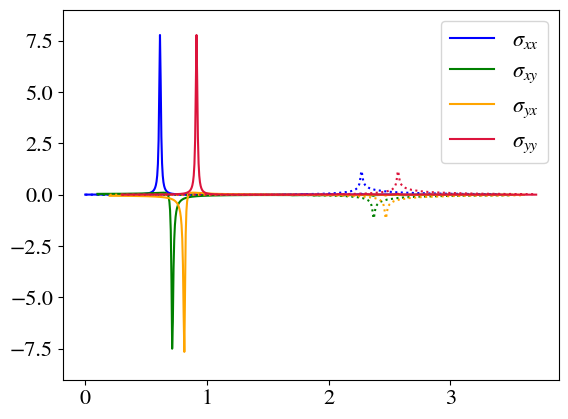

In [67]:
co = ("x","y")
color=("blue","green","orange","crimson")
count=0
for i in range(2):
    for j in range(2):
        plt.plot(ωarray/ηs00+0.1*count,σ_QP[:,i,j]*1e4,linestyle="dotted",c=color[count])
        plt.plot(ωarray/ηs00+0.1*count,(σ_coll+σ_QP)[:,i,j]*1e4,label="$\\sigma_{"+co[i]+co[j]+"}$",c=color[count])
        count+=1
plt.legend()
plt.ylim((-9,9))

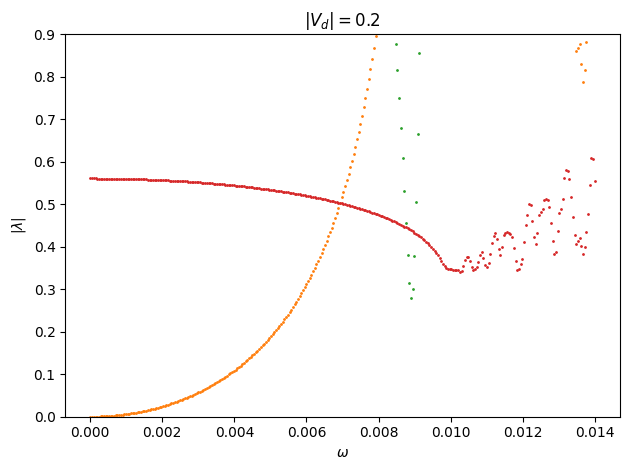

In [24]:
λ,modes = np.linalg.eig(Uinv)
plt.plot(ωarray,np.abs(λ),linestyle="none",marker=".",markersize=2)
plt.ylim((0,0.9))
#ps = [232,380]
#for i,peak in enumerate(ps):
#    plt.plot([ωarray[peak],ωarray[peak]],[1,np.min(abs(λ[peak]))],label="$\\omega_{"+str(i+1)+"}$"+f"= {ωarray[peak]:.3f}")
plt.ylabel("$|\\lambda|$")
plt.xlabel("$\\omega$")
plt.title(f"$|V_d|={Vd}$")
plt.tight_layout()
#plt.legend(loc="center left")
#plt.savefig("./Plots/modes_Vd=0,43.pdf")

In [5]:
# The Lifshitz-invariant
nt=100
temp = np.linspace(0,0.05,nt)
Vs = 1
Vd = 0
ηs0=   1
ηd0 =  0
N=600
q=0.
μ=0
ωc=20
ηsarray=[]
for i,t in enumerate(temp):
    print(f"{i+1} of {nt}..")
    clear_output(wait=True)
    ηs,ηd = gap.findGapVeryFast(Vs,Vd,ηs0,ηd0,N=N,tol=1e-10,maxiter=5000,ωc=ωc,T=t,qx=q,μ=μ,quiet=True,use="square")
    ηs0=ηs
    ηd0=ηd
    ηsarray.append(ηs)    

Converged after 1 iterations


(0.0, 0.05)

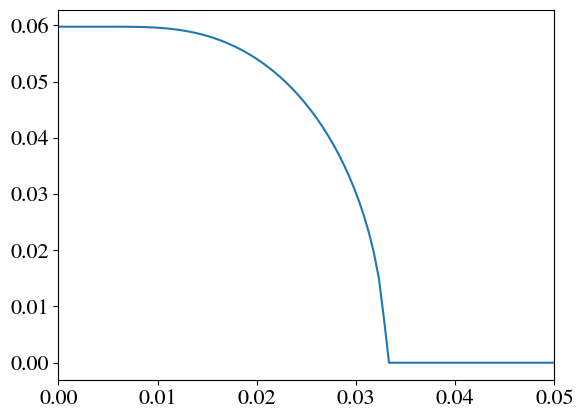

In [7]:
plt.plot(temp,ηsarray)
plt.xlim((0,0.05))

In [1]:
import lifshitz as lf
import numpy as np

In [47]:
d=lf.lifshitz(T=0.1,N=5000,reg=0,qx=0.01)

In [48]:
print((d[...,0]))

[[7.16112779e-02 2.75113857e-12]
 [2.75113857e-12 6.00158653e-02]]
